In [ ]:
import torch
import torchaudio
import numpy as np
import noisereduce as nr
import librosa
from IPython.display import Audio

In [53]:
audio_path = '/data/akshaj/MusicAI/GuitarSet/audio_mono-mic/04_Jazz2-110-Bb_comp_mic.wav'
audio, sr = librosa.load(audio_path)

In [ ]:
def guitar_denoise(audio, sr):
    denoised = nr.reduce_noise(
        y=audio, sr=sr,
        stationary=False,
        prop_decrease=.8,
        n_fft=2048,
        hop_length=512,
        n_std_thresh_stationary=2.0,
        freq_mask_smooth_hz=250,
        time_mask_smooth_ms=25,
        thresh_n_mult_nonstationary=2,
        sigmoid_slope_nonstationary=5,
        time_constant_s=1.0,
        chunk_size=60000
    )

    return denoised

In [ ]:
# Add noise to audio
noisy_audio = audio + np.random.normal(0, 0.005, size=audio.shape)

In [115]:
Audio(noisy_audio, rate=sr)

In [126]:
denoised_audio = guitar_denoise(noisy_audio, sr)

In [127]:
Audio(denoised_audio, rate=sr)

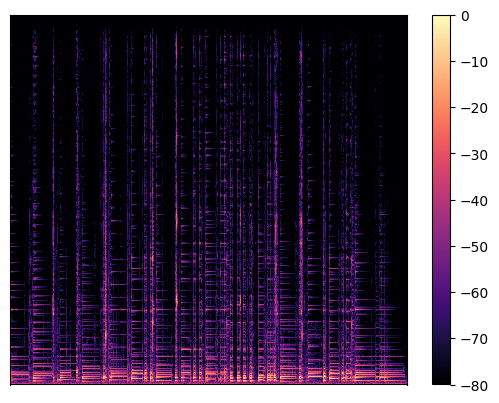

In [124]:
D = librosa.stft(audio)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()

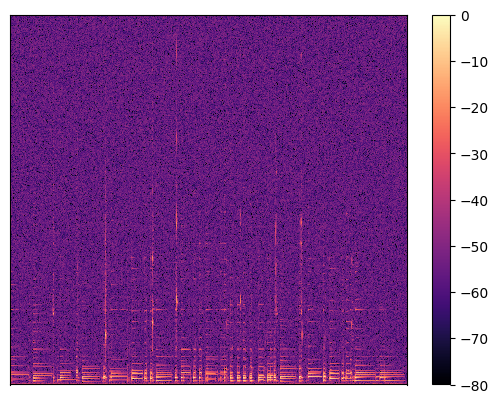

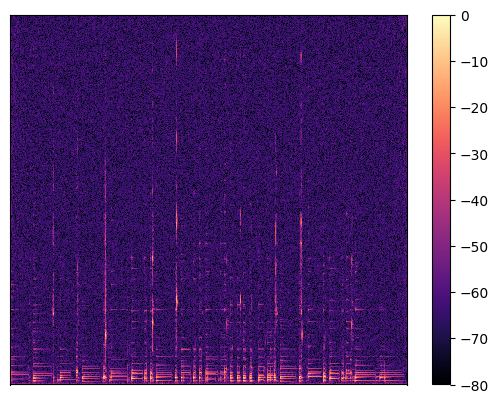

In [128]:
D = librosa.stft(noisy_audio)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()

D = librosa.stft(denoised_audio)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()

In [137]:
def calculate_snr(clean_signal, noisy_signal):
    """
    Calculate Signal-to-Noise Ratio (SNR) in dB
    
    Parameters:
    clean_signal: The clean/denoised signal
    noisy_signal: The original noisy signal
    
    Returns:
    SNR in dB
    """
    # Calculate signal power (clean signal)
    signal_power = np.mean(clean_signal ** 2)
    
    # Calculate noise power (difference between noisy and clean)
    noise = noisy_signal - clean_signal
    noise_power = np.mean(noise ** 2)
    
    # Avoid division by zero
    if noise_power == 0:
        return float('inf')
    
    # SNR in dB
    snr_db = 10 * np.log10(signal_power / noise_power)
    return snr_db

pre_snr, post_snr = calculate_snr(audio, noisy_audio), calculate_snr(audio, denoised_audio)
print(pre_snr, post_snr)
print(f'SNR before denoising: {pre_snr} dB\nSNR after denoising: {post_snr} dB')

16.5436921273102 4.231423873007948
SNR before denoising: 16.5436921273102 dB
SNR after denoising: 4.231423873007948 dB


In [ ]:
prin